In [1]:
# 1. Importar librerías necesarias
import pandas as pd
import numpy as np
import os
from datetime import datetime
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 2. Cargar dataset
data_path = os.path.join(os.path.dirname(os.getcwd()), 'data_sintetica', 'dataset_compras.csv')
df = pd.read_csv(data_path)
df.head()


,ID_Cliente,edad,ingresos,visitas_web,tiempo_web,productos_vistos,promociones_usadas,compra,monto_venta
0,C0001,30,2924.90,2.013366,-0.928528,0.893800,1.804473,0,0.00
1,C0002,33,2694.27,-0.242941,0.750742,-0.554035,1.387550,1,529.30
2,C0003,27,6515.97,-2.559062,-0.148233,-0.364018,0.355956,0,0.00
3,C0004,25,5469.12,0.887033,0.093840,-0.497945,2.831638,1,2144.86
4,C0005,28,2621.12,1.529819,-2.050463,1.430774,0.211051,0,0.00


In [3]:
# 3. Verificar columnas
print(df.columns)

Index(['ID_Cliente', 'edad', 'ingresos', 'visitas_web', 'tiempo_web',
       'productos_vistos', 'promociones_usadas', 'compra', 'monto_venta'],
      dtype='object')


In [4]:
# 4. Definir X (features) y y (target)
X = df[['edad', 'ingresos', 'visitas_web', 'tiempo_web', 'productos_vistos', 'promociones_usadas']]
y = df['compra']

In [5]:
# 5. Separar datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# ID_Cliente para resultados
id_test = df.loc[y_test.index, 'ID_Cliente'].reset_index(drop=True)

In [6]:
# 6. Crear y entrenar modelo Random Forest
modelo_rf = RandomForestClassifier(n_estimators=100, random_state=42)
modelo_rf.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [7]:
# 7. Predicciones
y_pred = modelo_rf.predict(X_test)
y_proba = modelo_rf.predict_proba(X_test)[:, 1]

In [8]:
# 8. Evaluación del modelo
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)

print(f"Accuracy: {accuracy:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")
print("\nMatriz de Confusión:")
print(confusion_matrix(y_test, y_pred))
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred))

Accuracy: 0.8763
ROC AUC: 0.9424

Matriz de Confusión:
[[1705  137]
 [ 234  924]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.88      0.93      0.90      1842
           1       0.87      0.80      0.83      1158

    accuracy                           0.88      3000
   macro avg       0.88      0.86      0.87      3000
weighted avg       0.88      0.88      0.88      3000



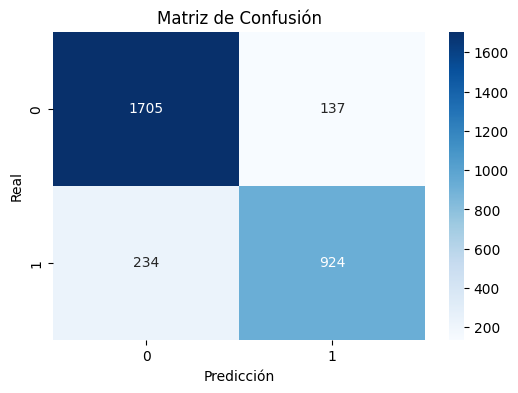

In [9]:
# 9. Visualización: Matriz de confusión
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Matriz de Confusión")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()

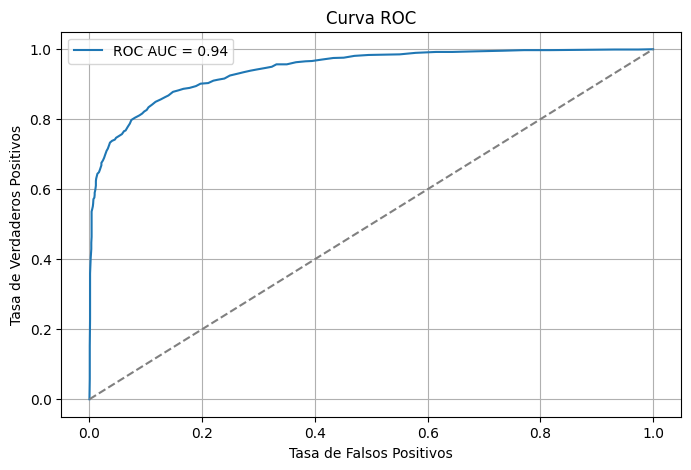

In [10]:
# 10. Curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.figure(figsize=(8,5))
plt.plot(fpr, tpr, label=f"ROC AUC = {roc_auc:.2f}")
plt.plot([0,1], [0,1], linestyle='--', color='gray')
plt.xlabel("Tasa de Falsos Positivos")
plt.ylabel("Tasa de Verdaderos Positivos")
plt.title("Curva ROC")
plt.legend()
plt.grid(True)
plt.show()

In [11]:
# 11. Guardar resultados
df_resultados = pd.DataFrame({
    'ID_Cliente': id_test,
    'compra_real': y_test.reset_index(drop=True),
    'compra_predicha': y_pred,
    'probabilidad_compra': y_proba.round(4)
})

# Ruta de guardado
result_dir = os.path.join(os.path.dirname(os.getcwd()), 'resultados_modelos', 'clasificacion')
os.makedirs(result_dir, exist_ok=True)

timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')
file_name = f"resultados_clasificacion_rf_{timestamp}.csv"
output_path = os.path.join(result_dir, file_name)

df_resultados.to_csv(output_path, index=False, encoding='utf-8-sig')
print(f"Resultados guardados en:\n{output_path}")

Resultados guardados en:
c:\cmder\IDL1_Machine_Learning_I\resultados_modelos\clasificacion\resultados_clasificacion_rf_20250720_153206.csv


In [13]:
# 12. Validación cruzada del modelo de clasificación (RandomForest)

from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, roc_auc_score

# Creamos un nuevo modelo 
modelo_cv_rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Validación cruzada con 5 folds, métrica: AUC
auc_scores = cross_val_score(
    modelo_cv_rf, X, y, 
    cv=5, 
    scoring='roc_auc'
)

print("\nValidación cruzada para modelo Random Forest:")
print(f" - AUC promedio: {auc_scores.mean():.4f}")
print(f" - AUC por fold: {np.round(auc_scores, 4)}")


Validación cruzada para modelo Random Forest:
 - AUC promedio: 0.9423
 - AUC por fold: [0.9387 0.9484 0.9348 0.9457 0.9439]
